# Veterinary Data Analysis using Python Data Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [4]:
pets = pd.read_csv("data/dummy_pets.csv")
procedures = pd.read_csv("data/dummy_procedures.csv")

#### Data Cleaning and datetime transformation

In [5]:
procedures["procedure_code"].isnull().value_counts() # This column has null values

procedure_code
False    607006
True        256
Name: count, dtype: int64

As the number of rows with null values in procecure code is 256, given total of 607262 i.e 0.042%, dropping the null values might affect the analysis as we are trying to fing maximum is various fields
Hence instead of dropping the rows, we add a temp procedure code for "C-SEC" as CSEC and "VIRTUAL BRAVECTO 9-22" as VIRTBRAV

In [12]:
procedures.loc[procedures["description"]=="C-SEC", "procedure_code"] = "CSEC"
procedures.loc[procedures["description"]=="VIRTUAL BRAVECTO 9-22", "procedure_code"] = "VIRTBRAV"
procedures["procedure_code"].isnull().value_counts()

procedure_code
False    607262
Name: count, dtype: int64

#### Changing the week_start_data to standard datetime format and adding a year column for ease of access

In [13]:
procedures['week_start_date'] = pd.to_datetime(procedures['week_start_date'], format='%m/%d/%y')
procedures['year'] = procedures['week_start_date'].dt.year

### Practice Analysis 

##### 1. Count of unique companies.

In [15]:
unique_companies = procedures['companyid'].nunique()
print(unique_companies)

52


##### 2. Count of unique practice locations.

In [16]:
unique_practice_locations = procedures[['companyid', 'locationid']].drop_duplicates().shape[0]
print(unique_practice_locations)

98


##### 3. Find the practice with the most procedures in 2022, and plot their procedure counts over all years compared to the average of all practices.

In [17]:
procedures_2022 = procedures[procedures['year']==2022]
practice_most_procedures_2022 = procedures_2022.groupby(['companyid', 'locationid'])
practice_most_procedures_2022 = practice_most_procedures_2022.size().idxmax()
print(practice_most_procedures_2022)

('V888834', '2-Jan')


##### Plot of procedure count of  practice_most_procedures_2022 or ('V888834', '2-Jan') over the years vs Average of all procedure's counts over the years

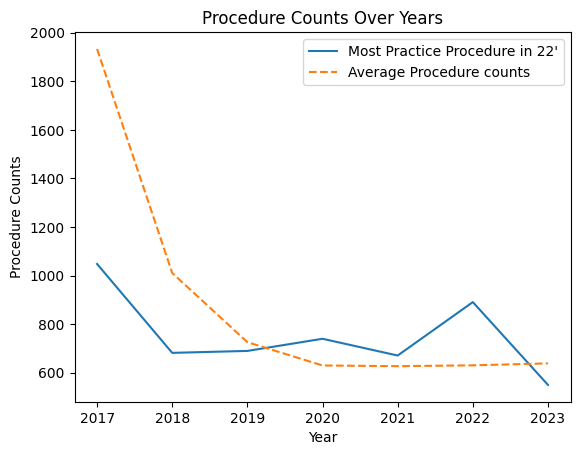

In [21]:
practice_procedures = procedures[(procedures['companyid'] == practice_most_procedures_2022[0]) & (procedures['locationid'] == practice_most_procedures_2022[1])]
yearly_counts = practice_procedures.groupby(["year"]).size()

avg_yearly_counts = procedures.groupby(["year", "companyid", "locationid"]).size().groupby(["year"]).mean()

plt.plot(yearly_counts.index, yearly_counts.values, label='Most Practice Procedure in 22\'')
plt.plot(avg_yearly_counts.index, avg_yearly_counts.values, label='Average Procedure counts',  linestyle='--')
plt.xlabel('Year')
plt.ylabel('Procedure Counts')
plt.title('Procedure Counts Over Years')
plt.legend()
plt.show()

##### 4. Find the practice with the most production in 2017, and plot their production totals over all years compared to the average of all practices.

In [22]:
procedures_2017 = procedures[procedures["year"]==2017]
practice_most_production_2017 = procedures_2017.groupby(['companyid', 'locationid'])['production'].sum().idxmax()
print(practice_most_production_2017)

('V822321', '2-Jan')


##### Plot of procedure count of  practice_most_procedures_2017 or ('V822321', '2-Jan') over the years vs Average of all procedure's counts over the years

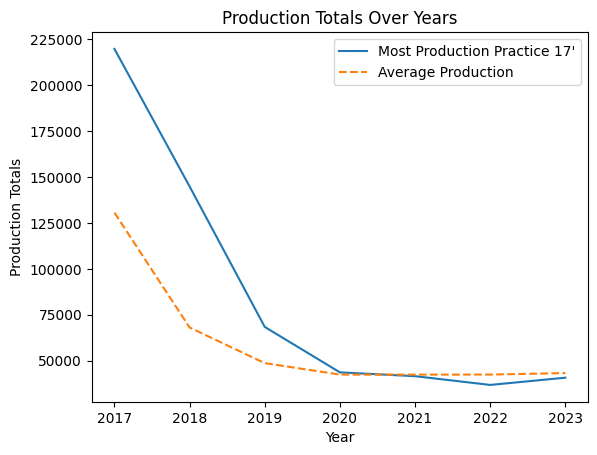

In [23]:
practice_production = procedures[(procedures['companyid'] == practice_most_production_2017[0]) & (procedures['locationid'] == practice_most_production_2017[1])]
yearly_production = practice_production.groupby(["year"])['production'].sum()

avg_yearly_production = procedures.groupby(["year","companyid", "locationid"])['production'].sum().groupby(["year"]).mean()

plt.plot(yearly_production.index, yearly_production.values, label='Most Production Practice 17\'')
plt.plot(avg_yearly_production.index, avg_yearly_production.values, label='Average Production',  linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production Totals')
plt.title('Production Totals Over Years')
plt.legend()
plt.show()

### Patient analysis

##### 1. Number of unique pets in our database.

In [24]:
unique_pets = pets['patientid'].nunique()
print(unique_pets)

900


##### 2. Average number of pets per owner.

In [25]:
avg_pets_per_owner = pets.groupby('clientid').size().mean()
print(int(avg_pets_per_owner))

220


##### 3. Find the owner with the most pets, and provide a table with details on each pet.

In [28]:
owner_most_pets = pets.groupby('clientid').size().idxmax()
print(owner_most_pets)

108


##### Table with details of pets of the owner with clinetid "108" i.e. most owned pet owner

In [43]:
owner_most_pets_details = pets[pets['clientid'] == owner_most_pets]
# Saved as an excel sheet at the end
owner_most_pets_details

,companyid,locationid,patientid,clientid,breed,species,age
47,V123289,1-Jan,848,108,TOY POODLE,CANINE,22
97,V123289,1-Jan,509,108,PITBULL,CANINE,12
1208,V133130,1-Jan,299,108,SHIH TZU,CANINE,9
2305,V133130,2-Jan,412,108,DACHSHUND,CANINE,7
2409,V133130,2-Jan,714,108,DOMESTIC LONG HAIR,FELINE,21
...,...,...,...,...,...,...,...
87201,V963087,1-Jan,918,108,DOMESTIC SHORTHAIR,FELINE,24
87510,V963087,1-Jan,615,108,RETRIEVER LABRADOR MIX,CANINE,8
87622,V963087,1-Jan,407,108,QUARTER HORSE,EQUINE,10
87787,V963087,1-Jan,626,108,TERRIER JACK RUSSELL MIX,CANINE,16


##### 4. Find the owner with the most clinic visits (number of procedures), and provide a table containing details of all of that owner’s visits.

In [32]:
procedures_with_client = procedures.merge(pets[['patientid', 'clientid']], on='patientid')
owner_most_visits = procedures_with_client.groupby('clientid').size().idxmax()
print(owner_most_visits)

108


##### Table with details of the owner's visit, owner "108" with max visits which is incidently the owner with max pets!

In [45]:
owner_most_visits_details = procedures_with_client[procedures_with_client['clientid'] == owner_most_visits]
# Saved as an excel sheet at the end.
owner_most_visits_details

,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year,clientid
173,V123289,1-Jan,MN,653,678,211.60,CANINE BOARDING 50-99#,2017-01-02,2017,108
398,V123289,1-Jan,MN,448,CADI60,148.50,CYTOPOINT INJECTION 50.1-60LBS,2017-01-02,2017,108
717,V123289,1-Jan,MN,375,121,21.50,RABIES 3Y CANINE,2017-01-02,2017,108
736,V123289,1-Jan,MN,375,121,21.50,RABIES 3Y CANINE,2017-01-02,2017,108
1113,V123289,1-Jan,MN,824,U40,40.40,"INSULIN SYRINGES U-40 0.3CC 29G X 0.5""",2017-01-02,2017,108
...,...,...,...,...,...,...,...,...,...,...
59378745,V963087,1-Jan,ID,677,FELC/DCANCHICK,3.85,C/D MULTICARE 5.5OZ CHICKEN-FELINE,2023-12-18,2023,108
59378862,V963087,1-Jan,ID,592,BVO,30.00,VAX - K9 BORDETELLA ORAL VACCINE,2023-12-18,2023,108
59379524,V963087,1-Jan,ID,168,2600,23.00,NAIL TRIM,2023-12-18,2023,108
59379550,V963087,1-Jan,ID,168,2600,23.00,NAIL TRIM,2023-12-18,2023,108


##### 5. Provide analysis of Cats vs. Dogs based on overall procedure history.

In [34]:
procedures_with_species = procedures.merge(pets[['companyid', 'locationid', 'patientid', 'species']], on=['companyid', 'locationid', 'patientid'])
cats_procedures = procedures_with_species[procedures_with_species['species'] == 'CAT']
dogs_procedures = procedures_with_species[procedures_with_species['species'] == 'DOG']

##### Analysis

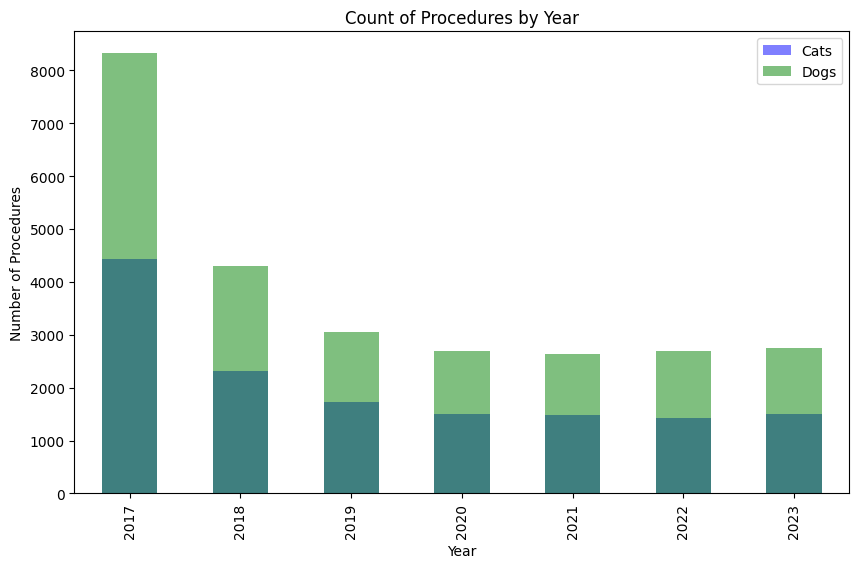

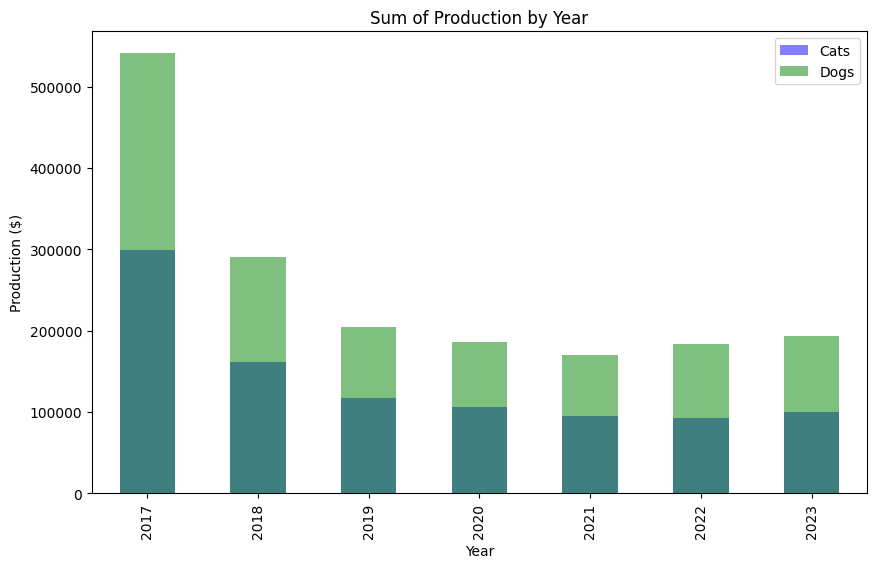

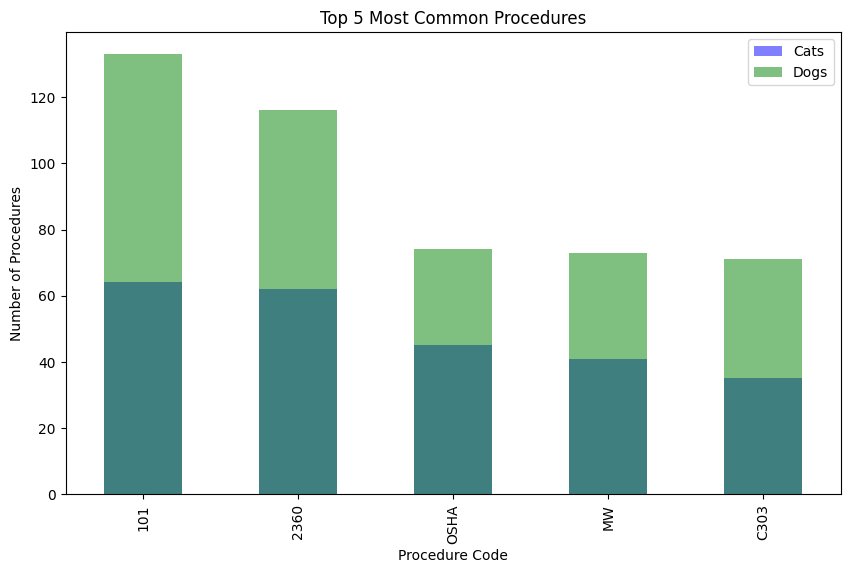

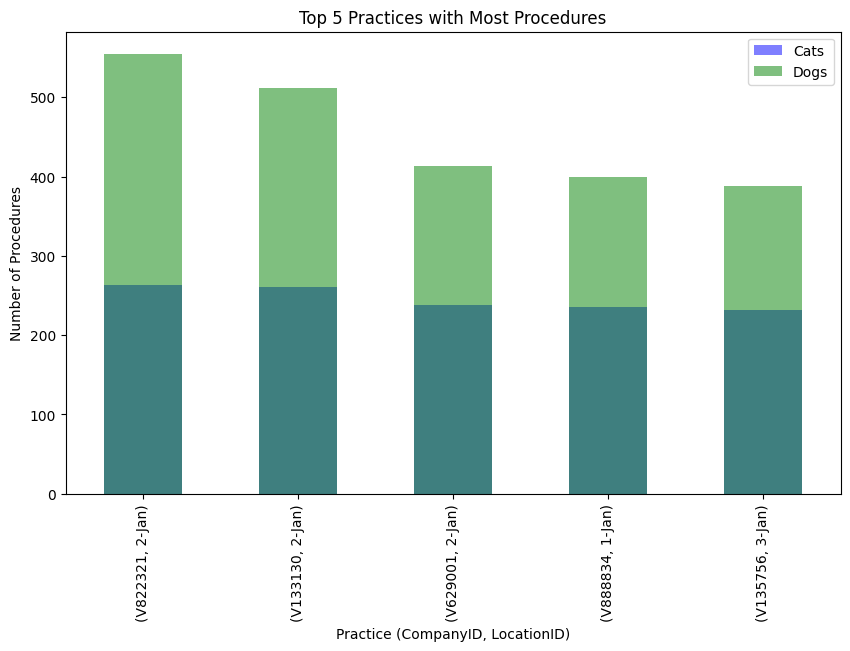

In [52]:
# 1. Count of Procedures by Year
cats_procedures_by_year = cats_procedures.groupby('year').size()
dogs_procedures_by_year = dogs_procedures.groupby('year').size()

plt.figure(figsize=(10, 6))
cats_procedures_by_year.plot(kind='bar', alpha=0.5, label='Cats', color='blue')
dogs_procedures_by_year.plot(kind='bar', alpha=0.5, label='Dogs', color='green')
plt.title('Count of Procedures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Procedures')
plt.legend()
plt.show()

# 2. Sum of Production by Year
cats_production_by_year = cats_procedures.groupby('year')['production'].sum()
dogs_production_by_year = dogs_procedures.groupby('year')['production'].sum()

plt.figure(figsize=(10, 6))
cats_production_by_year.plot(kind='bar', alpha=0.5, label='Cats', color='blue')
dogs_production_by_year.plot(kind='bar', alpha=0.5, label='Dogs', color='green')
plt.title('Sum of Production by Year')
plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.legend()
plt.show()

# 3. Top 5 Most Common Procedures
top_5_cats_procedures = cats_procedures['procedure_code'].value_counts().nlargest(5)
top_5_dogs_procedures = dogs_procedures['procedure_code'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
top_5_cats_procedures.plot(kind='bar', alpha=0.5, label='Cats', color='blue')
top_5_dogs_procedures.plot(kind='bar', alpha=0.5, label='Dogs', color='green')
plt.title('Top 5 Most Common Procedures')
plt.xlabel('Procedure Code')
plt.ylabel('Number of Procedures')
plt.legend()
plt.show()


# 4. Top 5 Practices with Most Procedures
top_5_practices_cats = cats_procedures.groupby(['companyid', 'locationid']).size().nlargest(5)
top_5_practices_dogs = dogs_procedures.groupby(['companyid', 'locationid']).size().nlargest(5)

plt.figure(figsize=(10, 6))
top_5_practices_cats.plot(kind='bar', alpha=0.5, label='Cats', color='blue')
top_5_practices_dogs.plot(kind='bar', alpha=0.5, label='Dogs', color='green')
plt.title('Top 5 Practices with Most Procedures')
plt.xlabel('Practice (CompanyID, LocationID)')
plt.ylabel('Number of Procedures')
plt.legend()
plt.show()

### Procedure Analysis

##### 1. Plot the 10 most common procedure codes by count.

procedure_code
101     2808
2360    2673
1       1658
OSHA    1589
EXAM    1455
NT      1398
C303    1372
100     1369
401     1315
MW      1315
Name: count, dtype: int64


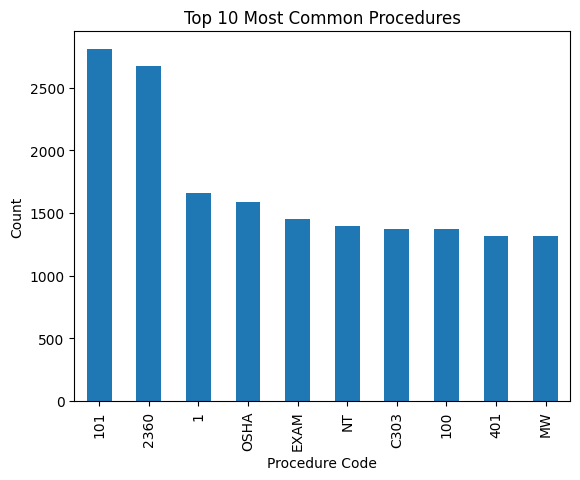

In [36]:
top_10_procedures = procedures['procedure_code'].value_counts().head(10)
print(top_10_procedures)
top_10_procedures.plot(kind='bar')
plt.xlabel('Procedure Code')
plt.ylabel('Count')
plt.title('Top 10 Most Common Procedures')
plt.show()

##### 2. Provide analysis on the most common procedure code.

In [37]:
most_common_procedure_code = procedures['procedure_code'].value_counts().idxmax()
print(most_common_procedure_code)

101


##### Most Common procedure is "101" details for which are given below

In [38]:
most_common_procedure_details = procedures[procedures['procedure_code'] == most_common_procedure_code]
most_common_procedure_details

,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year
385,V123289,1-Jan,MN,800,101,30.00,DA2LPPARVO PUPPY (10-13 WKS OLD),2017-05-01,2017
844,V123289,1-Jan,MN,747,101,96.50,EXAM,2017-09-04,2017
852,V123289,1-Jan,MN,885,101,76.00,OFFICE- REGULAR EXAM,2017-09-11,2017
899,V123289,1-Jan,MN,572,101,95.50,EXAM,2017-09-25,2017
921,V123289,1-Jan,MN,822,101,30.88,OFFICE VISITEXAM,2017-10-02,2017
...,...,...,...,...,...,...,...,...,...
605045,V963087,1-Jan,ID,480,101,78.00,OFFICE- REGULAR EXAM,2020-06-15,2020
606264,V963087,1-Jan,ID,450,101,102.00,OFFICE VISIT SICK PET,2022-04-04,2022
606630,V963087,1-Jan,ID,837,101,20.04,EXAMINATION CONSULTATION,2022-11-28,2022
606995,V963087,1-Jan,ID,930,101,84.00,OFFICE- REGULAR EXAM,2023-07-03,2023


##### Analysis

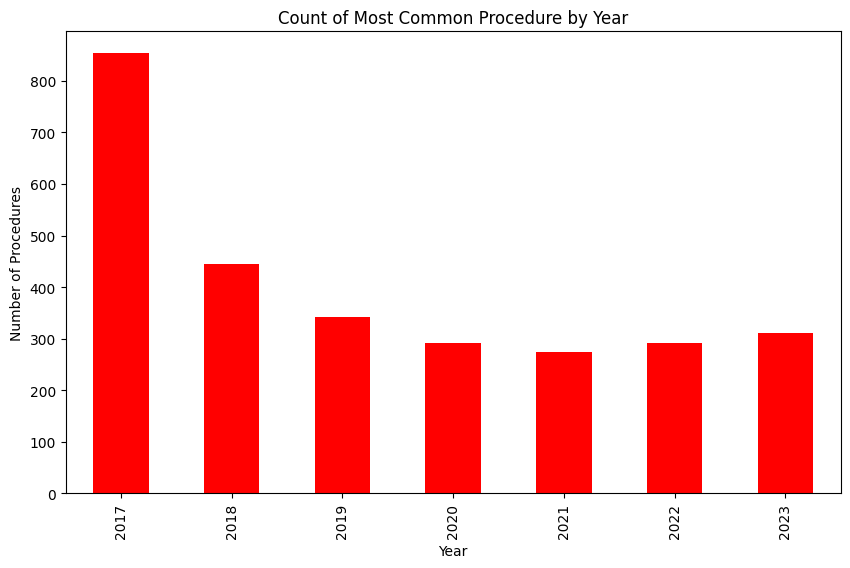

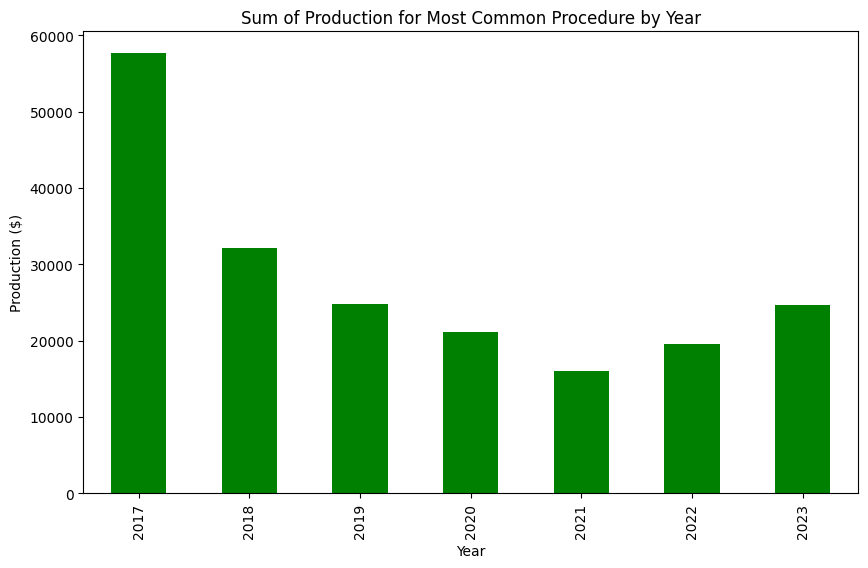

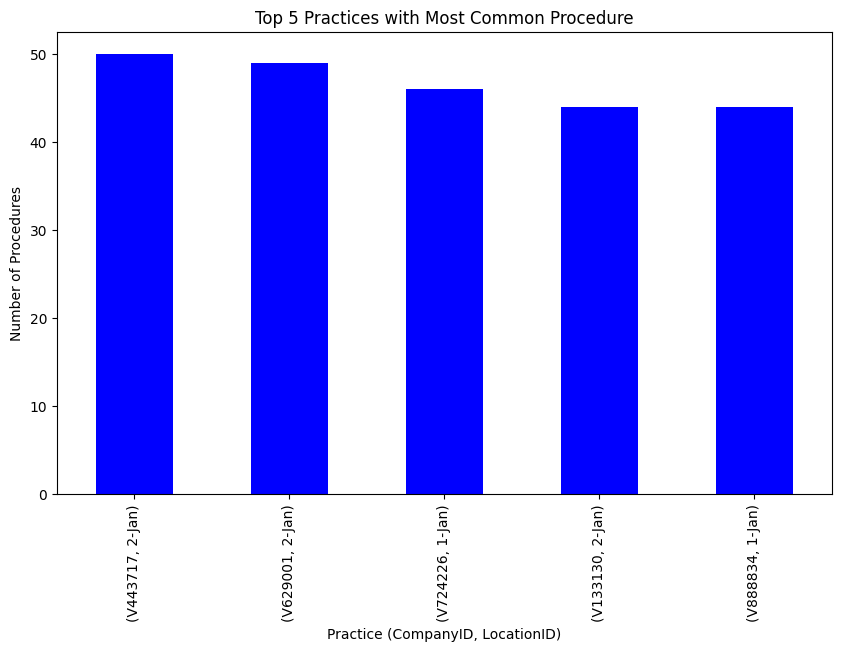

In [56]:
# Count of Most Common Procedure by Year
most_common_procedure_by_year = most_common_procedure_details.groupby('year').size()
plt.figure(figsize=(10, 6))
most_common_procedure_by_year.plot(kind='bar', title='Count of Most Common Procedure by Year', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Procedures')
plt.show()

# Sum of Production for the Most Common Procedure by Year
most_common_production_by_year = most_common_procedure_details.groupby('year')['production'].sum()
plt.figure(figsize=(10, 6))
most_common_production_by_year.plot(kind='bar', title='Sum of Production for Most Common Procedure by Year', color='green')
plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.show()

# Top 5 Practices with Most Common Procedure
top_5_practices_most_common = most_common_procedure_details.groupby(['companyid', 'locationid']).size().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_practices_most_common.plot(kind='bar', title='Top 5 Practices with Most Common Procedure', color='blue')
plt.xlabel('Practice (CompanyID, LocationID)')
plt.ylabel('Number of Procedures')
plt.show()

##### 3. Build a procedure dataset for all procedures containing keyword “IDEXX” and provide analysis on this subset.

In [48]:
idexx_procedures = procedures[procedures['description'].str.contains('IDEXX')]

# Saved as a dataset in csv format
file_path = 'data/idexx_procedures.csv'
idexx_procedures.to_csv(file_path, index=False)

idexx_procedures

,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year
10,V123289,1-Jan,MN,332,I910,71.00,IDEXX URINALYSIS,2017-01-02,2017
25,V123289,1-Jan,MN,749,24639,88.57,IDEXX FECAL DX PROFILE W GIARDIA,2017-01-09,2017
159,V123289,1-Jan,MN,445,I910,71.00,IDEXX URINALYSIS,2017-02-20,2017
301,V123289,1-Jan,MN,128,IDX105,61.81,IDEXX CBC,2017-04-03,2017
389,V123289,1-Jan,MN,294,490IDX,40.50,IDEXX HEARTWORM SNAP TEST,2017-05-01,2017
...,...,...,...,...,...,...,...,...,...
607030,V963087,1-Jan,ID,575,27013,76.00,CBC - IDEXX,2023-07-31,2023
607077,V963087,1-Jan,ID,507,3231,61.96,FECAL O&P PRIMATE - IDEXX #320438,2023-08-28,2023
607078,V963087,1-Jan,ID,269,IL5010,47.49,IDEXX OVA AND PARASITES 3 OR MORE,2023-08-28,2023
607123,V963087,1-Jan,ID,601,1189,129.00,IDEXX CUSTOM PROFILE 212-STANDARD CB,2023-10-02,2023


##### Analysis

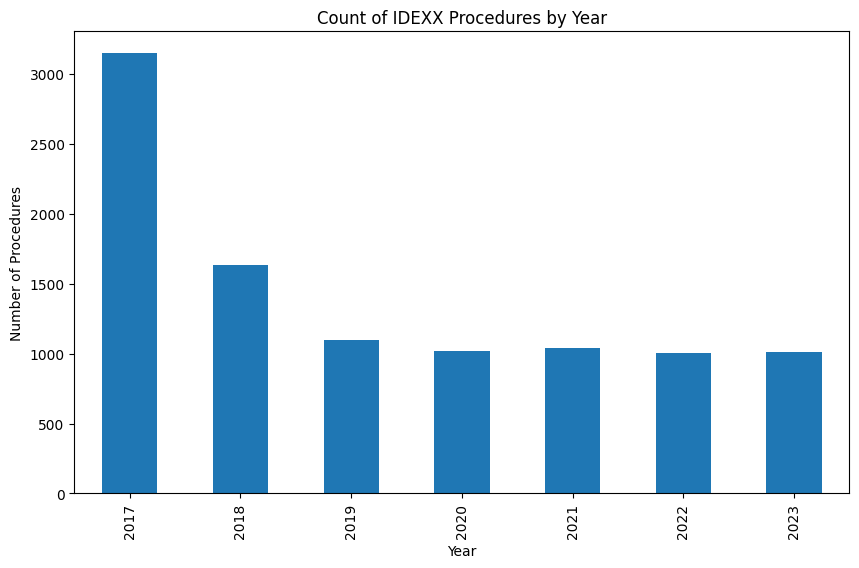

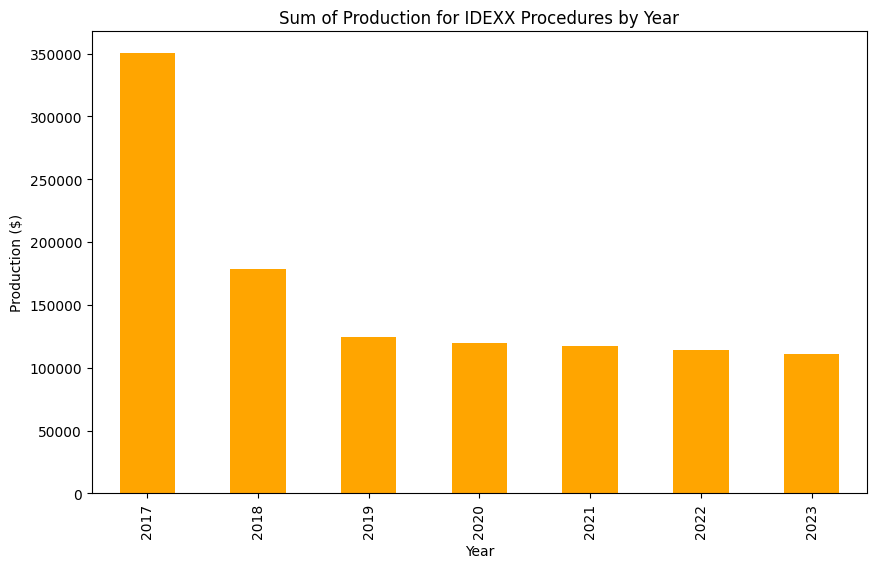

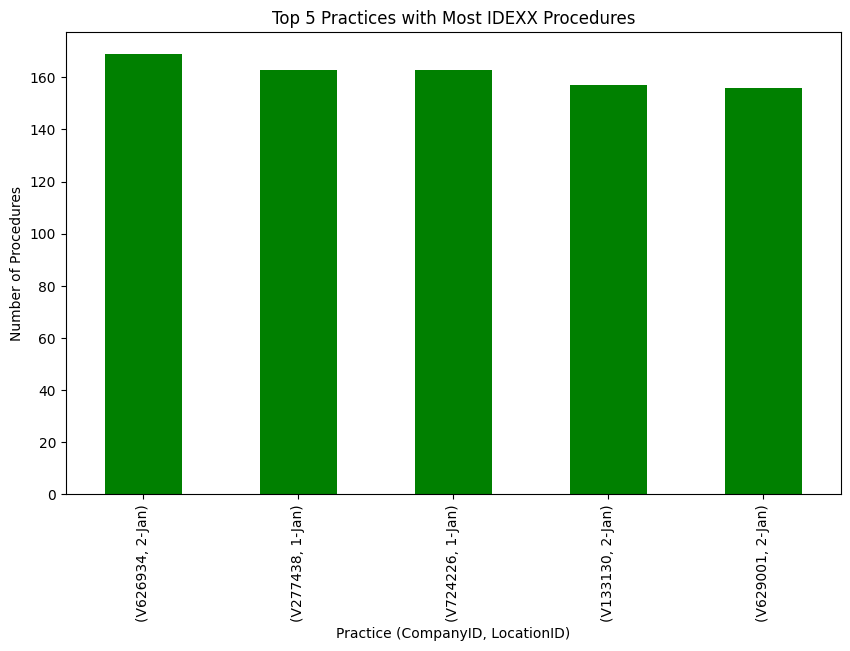

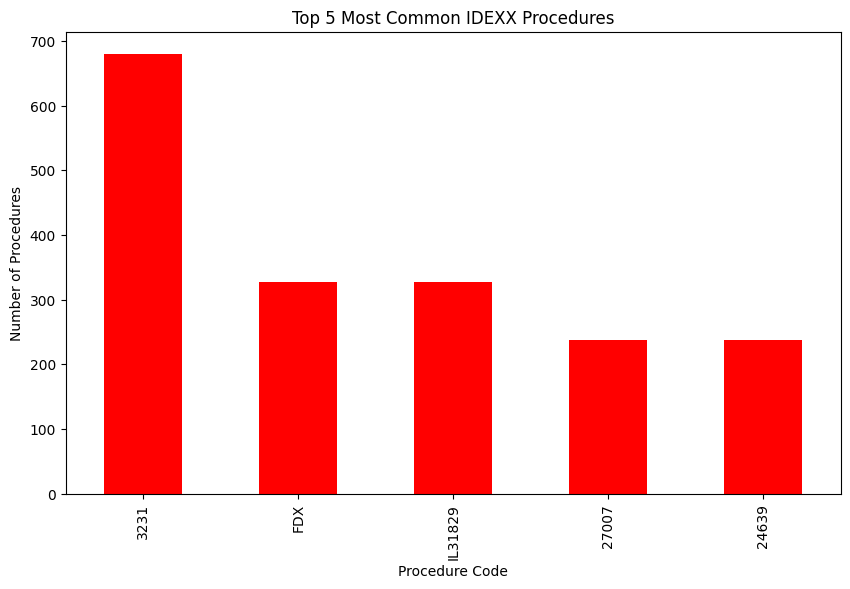

In [57]:
# Count of IDEXX Procedures by Year
idexx_procedures_by_year = idexx_procedures.groupby('year').size()
plt.figure(figsize=(10, 6))
idexx_procedures_by_year.plot(kind='bar', title='Count of IDEXX Procedures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Procedures')
plt.show()

# Sum of Production for IDEXX Procedures by Year
idexx_production_by_year = idexx_procedures.groupby('year')['production'].sum()
plt.figure(figsize=(10, 6))
idexx_production_by_year.plot(kind='bar', title='Sum of Production for IDEXX Procedures by Year', color='orange')
plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.show()

# Top 5 Practices with Most IDEXX Procedures
top_5_practices_idexx = idexx_procedures.groupby(['companyid', 'locationid']).size().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_practices_idexx.plot(kind='bar', title='Top 5 Practices with Most IDEXX Procedures', color='green')
plt.xlabel('Practice (CompanyID, LocationID)')
plt.ylabel('Number of Procedures')
plt.show()

# Top 5 Most Common IDEXX Procedures
top_5_idexx_procedures = idexx_procedures['procedure_code'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_idexx_procedures.plot(kind='bar', title='Top 5 Most Common IDEXX Procedures', color='red')
plt.xlabel('Procedure Code')
plt.ylabel('Number of Procedures')
plt.show()

In [46]:
with pd.ExcelWriter("data/Tables.xlsx") as writer:
    owner_most_pets_details.to_excel(writer, sheet_name='Most pets Owner details', index=False)
    owner_most_visits_details.to_excel(writer, sheet_name='Most visits Owner details', index=False)